In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set(rc = {'figure.figsize': (6,6)})

# Automobile DataSet

## Data Preparation, Basic information of data and cleaning

In [4]:
df = pd.read_csv('Automobile_data.csv')
df.head(20)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,177.3,66.3,53.1,2507,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,192.7,71.4,55.7,2844,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,192.7,71.4,55.7,2954,ohc,five,136,mpfi,3.19,3.4,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,192.7,71.4,55.9,3086,ohc,five,131,mpfi,3.13,3.4,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,178.2,67.9,52.0,3053,ohc,five,131,mpfi,3.13,3.4,7.0,160,5500,16,22,?


In [5]:
df.shape

(205, 26)

In [6]:
df.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [7]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Missing percentages

In [9]:
missing_percentages = (df.isna().sum().sort_values(ascending = False) / len(df)) * 100
missing_percentages

symboling            0.0
normalized-losses    0.0
highway-mpg          0.0
city-mpg             0.0
peak-rpm             0.0
horsepower           0.0
compression-ratio    0.0
stroke               0.0
bore                 0.0
fuel-system          0.0
engine-size          0.0
num-of-cylinders     0.0
engine-type          0.0
curb-weight          0.0
height               0.0
width                0.0
length               0.0
wheel-base           0.0
engine-location      0.0
drive-wheels         0.0
body-style           0.0
num-of-doors         0.0
aspiration           0.0
fuel-type            0.0
make                 0.0
price                0.0
dtype: float64

In [10]:
df['normalized-losses'] = df['normalized-losses']. replace('?', 0)
df['normalized-losses'].value_counts()/ len(df)

normalized-losses
0      0.200000
161    0.053659
91     0.039024
150    0.034146
134    0.029268
128    0.029268
104    0.029268
85     0.024390
94     0.024390
65     0.024390
102    0.024390
74     0.024390
168    0.024390
103    0.024390
95     0.024390
106    0.019512
93     0.019512
118    0.019512
148    0.019512
122    0.019512
83     0.014634
125    0.014634
154    0.014634
115    0.014634
137    0.014634
101    0.014634
119    0.009756
87     0.009756
89     0.009756
192    0.009756
197    0.009756
158    0.009756
81     0.009756
188    0.009756
194    0.009756
153    0.009756
129    0.009756
108    0.009756
110    0.009756
164    0.009756
145    0.009756
113    0.009756
256    0.004878
107    0.004878
90     0.004878
231    0.004878
142    0.004878
121    0.004878
78     0.004878
98     0.004878
186    0.004878
77     0.004878
Name: count, dtype: float64

## Exploratory Data Analysis
### Columns : These are some of the factors a middle cas car buyer would check for
1. Price
2. Make
3. Symboling
4. fuel-Type
6. city-mpg
7. highway-mpg
8. number of doors

## Price Column
1. Price column is not a numeric column hence first converting it into numberic
2. Price column also has few null values, and there is no point of keeping these as price is the major indicator of this analyis
3. 4 na values, removed them
4. AFter looking at the box plot, we realised there are heavily priced cars as well. Although high priced cars arent what a middle class person would go for, but they are worth the investigation. Hence, leaving them for now

In [13]:
df['price'].head(50)

0     13495
1     16500
2     16500
3     13950
4     17450
5     15250
6     17710
7     18920
8     23875
9         ?
10    16430
11    16925
12    20970
13    21105
14    24565
15    30760
16    41315
17    36880
18     5151
19     6295
20     6575
21     5572
22     6377
23     7957
24     6229
25     6692
26     7609
27     8558
28     8921
29    12964
30     6479
31     6855
32     5399
33     6529
34     7129
35     7295
36     7295
37     7895
38     9095
39     8845
40    10295
41    12945
42    10345
43     6785
44        ?
45        ?
46    11048
47    32250
48    35550
49    36000
Name: price, dtype: object

In [14]:
df['price'] = df['price'].replace('?', np.nan)
df['price'] = pd.to_numeric(df['price'])

In [15]:
df['price'].isna().sum()

4

C:\Users\Spegr\AppData\Local\Temp\ipykernel_2948\3095993874.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


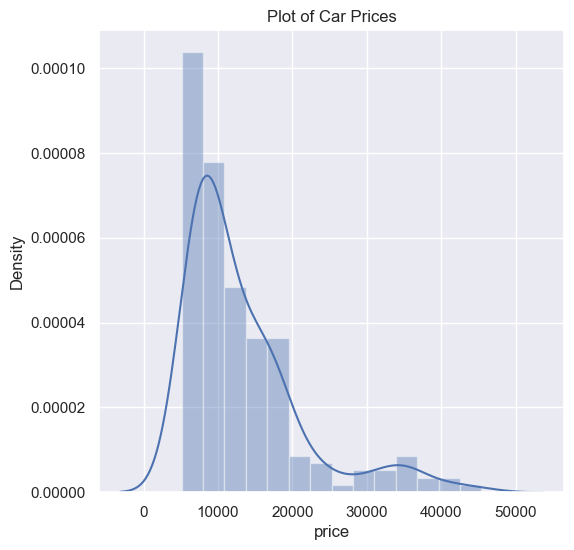

In [16]:
sns.distplot(df['price'])
plt.title('Plot of Car Prices')
# Show the plot
plt.show()

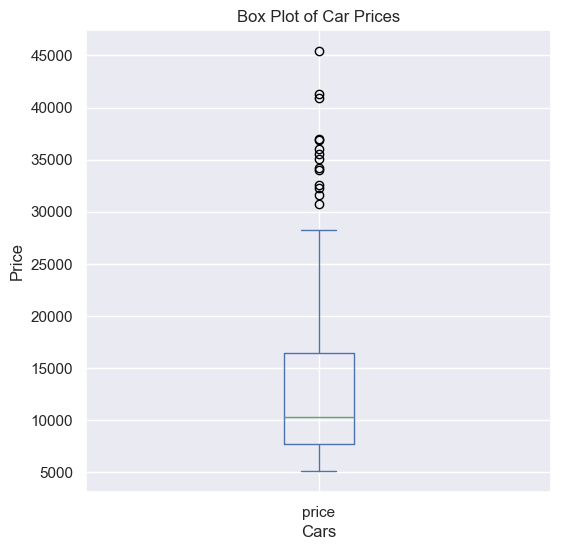

In [17]:
df['price'].plot(kind = 'box')
plt.title('Box Plot of Car Prices')
plt.ylabel('Price')
plt.xlabel('Cars')

# Show the plot
plt.show()

## Make column
1. Toyota seems to be the most bought car in this dataset. Definitely need to investigate toyota
2. Why are toyota cars most sold? Is it because of the price? Or specifications
3. What is the price range of toyota cars?
4. Check the price range of nissan cars as well
5. Why are cars from mercury sold very less? Is it because of price?

In [19]:
df['make'].value_counts()

make
toyota           32
nissan           18
mazda            17
mitsubishi       13
honda            13
volkswagen       12
subaru           12
peugot           11
volvo            11
dodge             9
mercedes-benz     8
bmw               8
audi              7
plymouth          7
saab              6
porsche           5
isuzu             4
jaguar            3
chevrolet         3
alfa-romero       3
renault           2
mercury           1
Name: count, dtype: int64

In [20]:
(df['make'].value_counts() / len(df))*100

make
toyota           15.609756
nissan            8.780488
mazda             8.292683
mitsubishi        6.341463
honda             6.341463
volkswagen        5.853659
subaru            5.853659
peugot            5.365854
volvo             5.365854
dodge             4.390244
mercedes-benz     3.902439
bmw               3.902439
audi              3.414634
plymouth          3.414634
saab              2.926829
porsche           2.439024
isuzu             1.951220
jaguar            1.463415
chevrolet         1.463415
alfa-romero       1.463415
renault           0.975610
mercury           0.487805
Name: count, dtype: float64

In [21]:
make_avg_price = df.groupby(df['make'])['price'].mean()

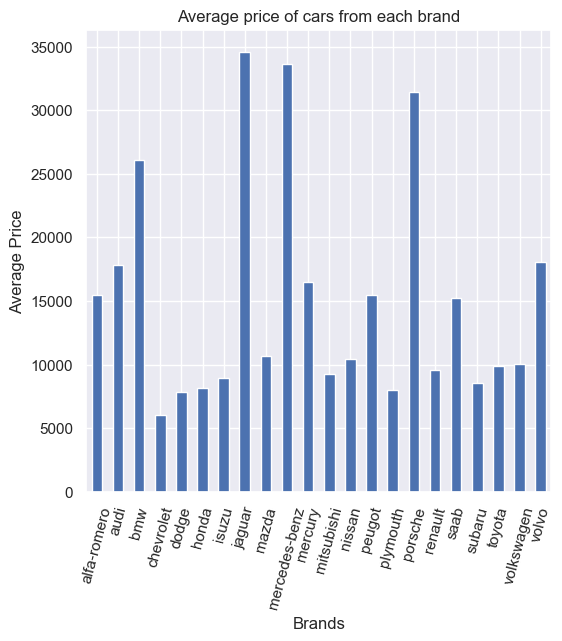

In [22]:
make_avg_price
make_avg_price.plot(kind = 'bar')
plt.title('Average price of cars from each brand')
plt.xlabel('Brands')
plt.ylabel('Average Price')
plt.xticks(rotation = 75)
plt.show()

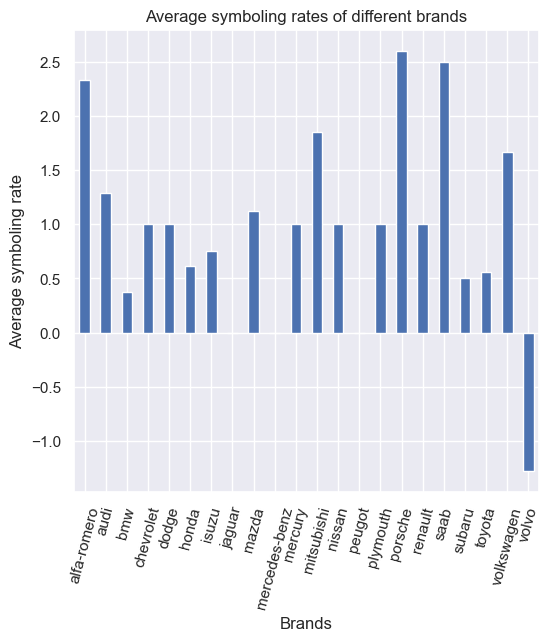

In [23]:
make_avg_symobling = df.groupby(df['make'])['symboling'].mean()
make_avg_symobling.plot(kind = 'bar')
plt.title('Average symboling rates of different brands')
plt.xlabel('Brands')
plt.ylabel('Average symboling rate')
plt.xticks(rotation = 75)
plt.show()

## Fuel-type

Text(0.5, 1.0, 'Percentages of fuel-type')

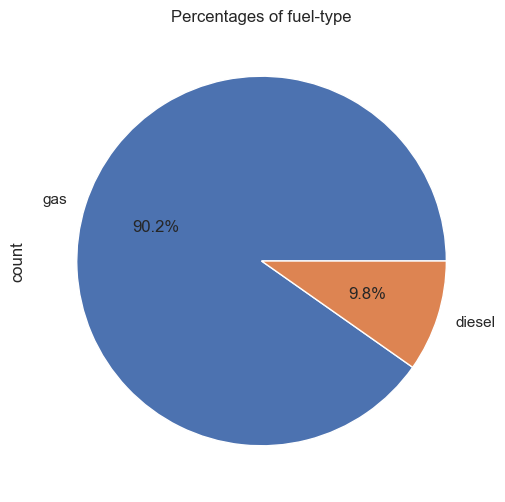

In [25]:
df['fuel-type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Percentages of fuel-type')

In [26]:
df_gas_make = df[df['fuel-type']=='gas']

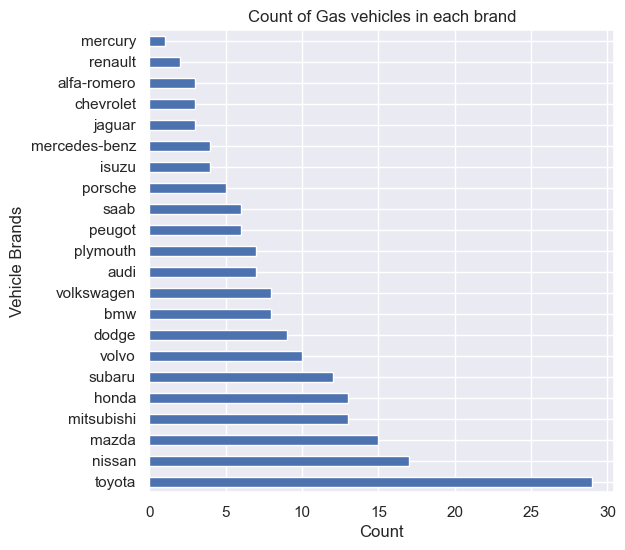

In [27]:
df_gas_make['make'].value_counts().plot(kind = 'barh')
plt.title('Count of Gas vehicles in each brand')
plt.xlabel('Count')
plt.ylabel('Vehicle Brands')
plt.show()

## Vehicle specifications Columns

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

### Categorical columns

In [30]:
df_categorical = df.select_dtypes(include = ['object']).columns

In [31]:
df_categorical

Index(['normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors',
       'body-style', 'drive-wheels', 'engine-location', 'engine-type',
       'num-of-cylinders', 'fuel-system', 'bore', 'stroke', 'horsepower',
       'peak-rpm'],
      dtype='object')

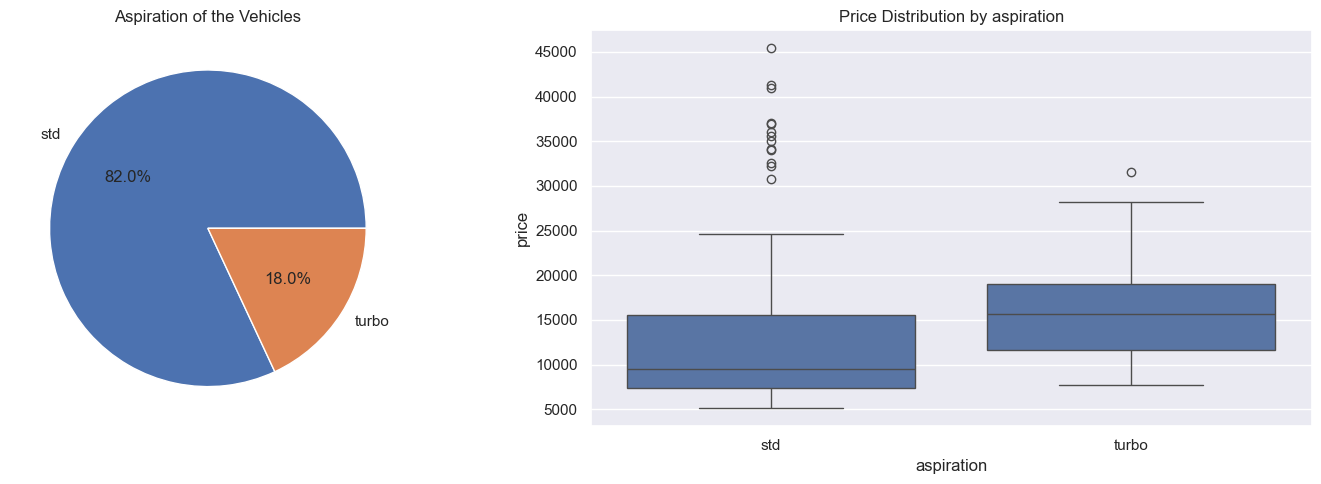

In [32]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

df['aspiration'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Aspiration of the Vehicles')
axes[0].set_ylabel('')  # Remove y-axis label for a cleaner look

# Plot the box plot on the second subplot
sns.boxplot(x='aspiration', y='price', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by aspiration')

# Display the plots
plt.tight_layout()
plt.show()


In [33]:
turbo_avg_price = df.groupby(df['aspiration'])['price'].mean()
turbo_avg_price

aspiration
std      12542.181818
turbo    16254.805556
Name: price, dtype: float64

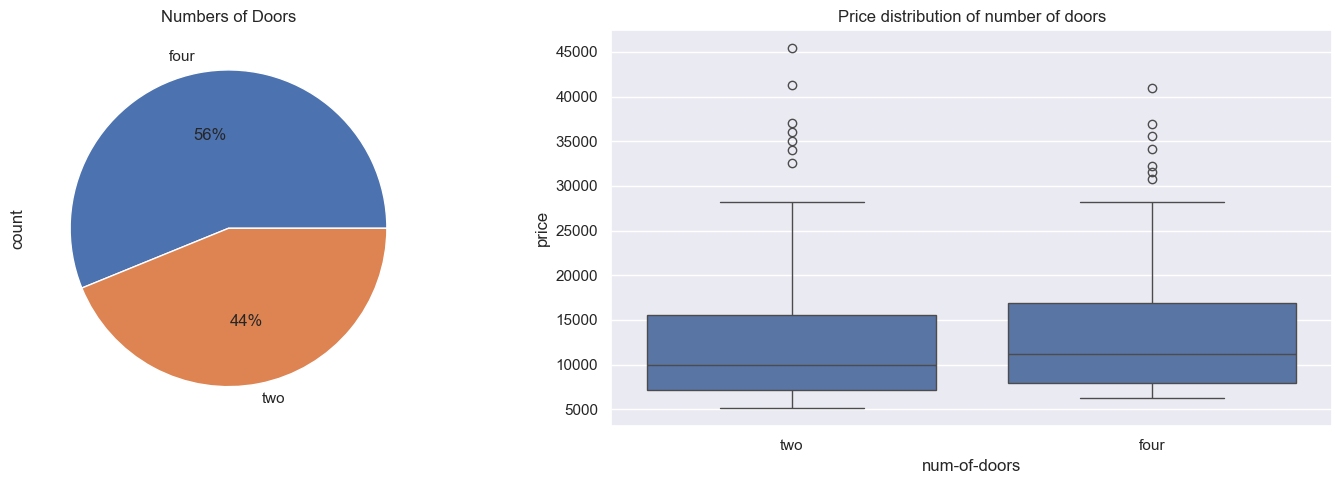

In [117]:
fig, axes = plt.subplots(1,2, figsize = (15, 5))

df['num-of-doors'].value_counts().plot(kind = 'pie', autopct = '%1.f%%', ax = axes[0])
axes[0].set_title('Numbers of Doors')

sns.boxplot(x = 'num-of-doors', y = 'price', data =df, ax = axes[1])
axes[1].set_title('Price distribution of number of doors')

plt.tight_layout()
plt.show()

In [35]:
df['num-of-doors'] = df['num-of-doors'].replace('?', np.nan)
df = df.dropna(subset = ['num-of-doors'])

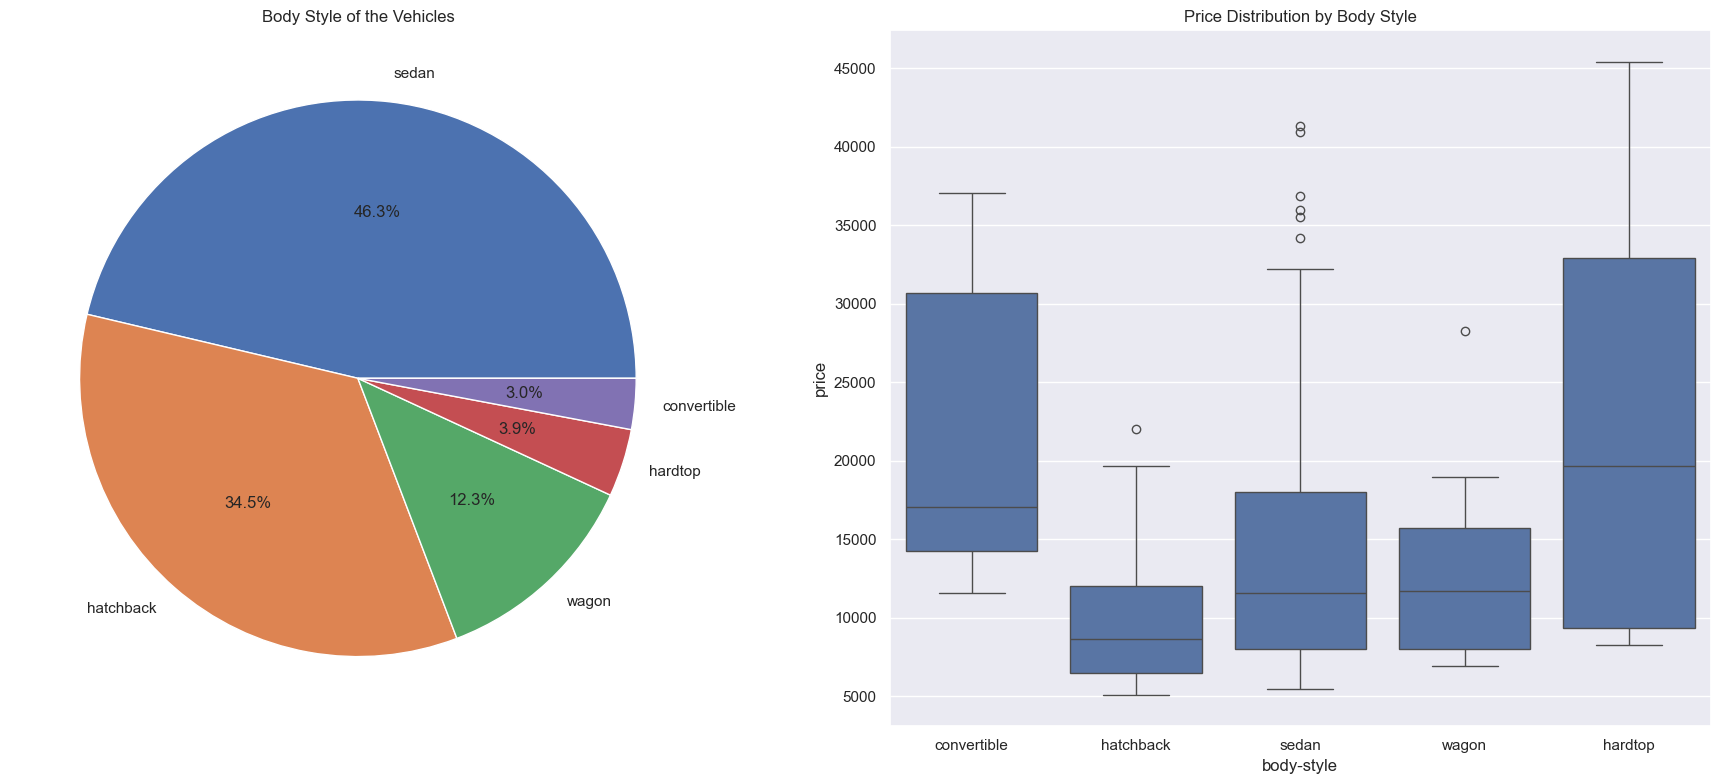

In [36]:
# Define a figure with two subplots: one for the pie chart, one for the box plot
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Plot the pie chart on the first subplot
df['body-style'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[0])
axes[0].set_title('Body Style of the Vehicles')
axes[0].set_ylabel('')  # Remove y-axis label for a cleaner look

# Plot the box plot on the second subplot
sns.boxplot(x='body-style', y='price', data=df, ax=axes[1])
axes[1].set_title('Price Distribution by Body Style')

# Display the plots
plt.tight_layout()
plt.show()

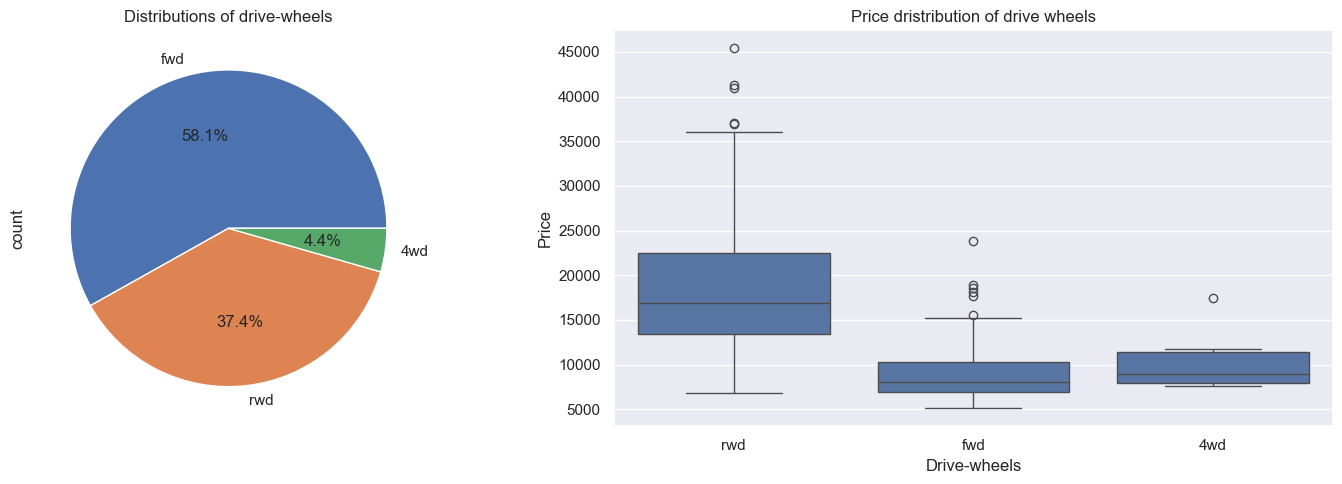

In [37]:
fig, axes = plt.subplots(1, 2 , figsize = (15,5))

df['drive-wheels'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', ax = axes[0])
axes[0].set_title('Distributions of drive-wheels')

sns.boxplot(x = 'drive-wheels', y = 'price', data = df, ax = axes[1])
axes[1].set_title('Price dristribution of drive wheels')
axes[1].set_xlabel('Drive-wheels')
axes[1].set_ylabel('Price')


plt.tight_layout()
plt.show()

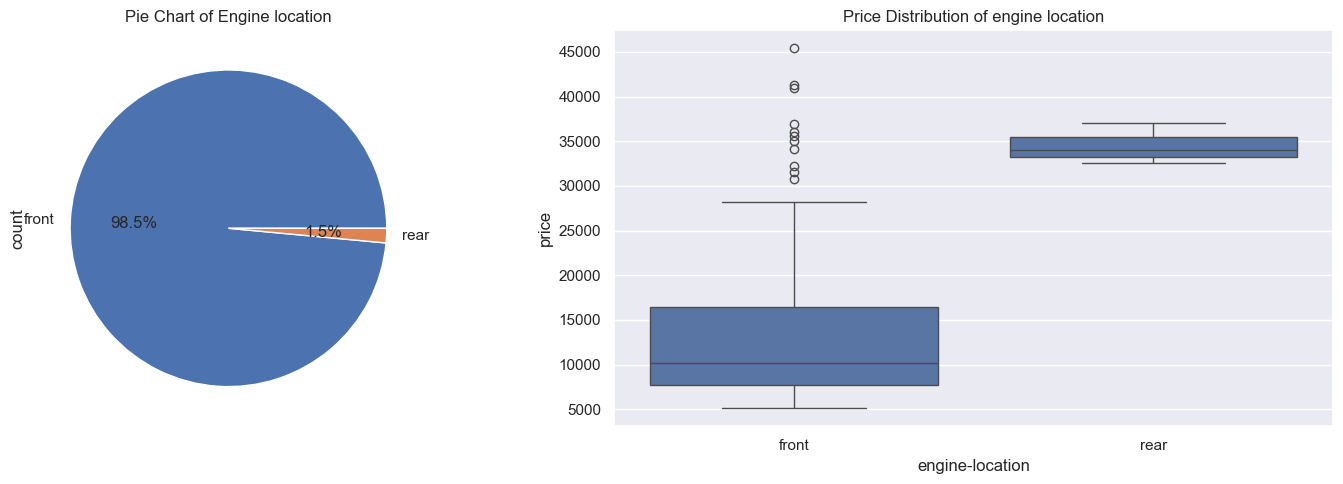

In [38]:
fig, axes = plt.subplots(1,2, figsize = (15,5))

df['engine-location'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%', ax = axes[0])
axes[0].set_title('Pie Chart of Engine location')

sns.boxplot(x = 'engine-location', y = 'price', data = df, ax = axes[1])
axes[1].set_title('Price Distribution of engine location')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Pie Chart of Number of Cylinder')

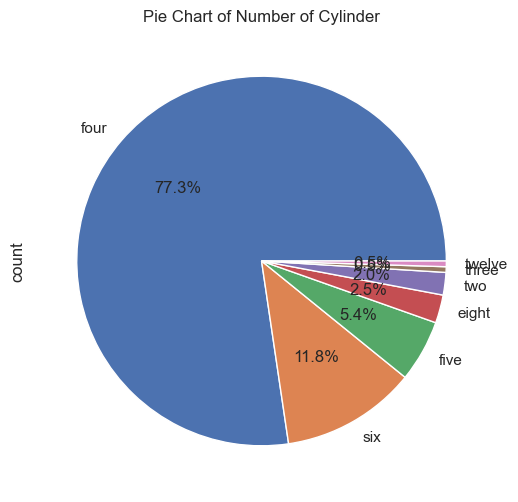

In [39]:
df['num-of-cylinders'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Pie Chart of Number of Cylinder')

Text(0.5, 1.0, 'Engine Type')

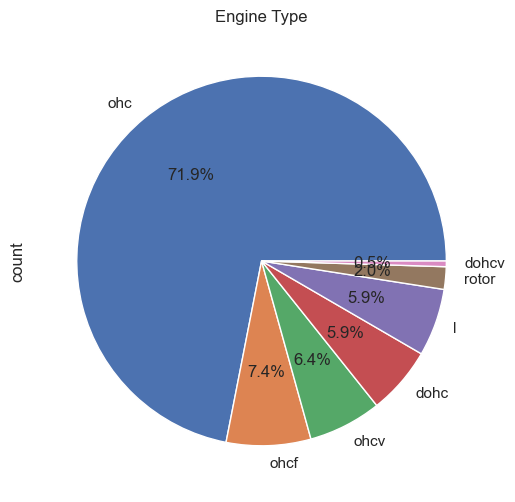

In [40]:
df['engine-type'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')
plt.title('Engine Type')

In [82]:
df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg,price
count,203.000000,203.000000,203.00000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,203.000000,199.000000
mean,0.837438,98.781281,174.11330,65.915271,53.731527,2557.916256,127.073892,10.093202,25.172414,30.699507,13242.613065
std,1.250021,6.040994,12.33909,2.150274,2.442526,522.557049,41.797123,3.888216,6.529812,6.874645,7978.344857
min,-2.000000,86.600000,141.10000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.55000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000,7775.000000
50%,1.000000,97.000000,173.20000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.30000,66.900000,55.500000,2943.500000,143.000000,9.400000,30.000000,34.000000,16501.500000
max,3.000000,120.900000,208.10000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000,45400.000000


In [84]:
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950.0
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450.0


### Numeric columns

In [88]:
df['normalized-losses'] = pd.to_numeric(df['normalized-losses'], errors='coerce')
df['bore'] = pd.to_numeric(df['bore'], errors='coerce')
df['stroke'] = pd.to_numeric(df['stroke'], errors='coerce')
df['horsepower'] = pd.to_numeric(df['horsepower'], errors='coerce')
df['peak-rpm'] = pd.to_numeric(df['peak-rpm'], errors='coerce')

In [100]:
df_numeric = df.select_dtypes(include = ['int64', 'float64'])
df_numeric.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [106]:
df_numeric.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.192669,-0.532929,-0.357856,-0.232241,-0.541323,-0.228520,-0.105985,-0.133130,-0.007956,-0.172343,0.068551,0.272162,-0.030513,0.040374,-0.083237
normalized-losses,0.192669,1.000000,-0.194755,-0.231451,-0.192405,-0.158256,-0.262759,-0.302397,-0.203200,-0.064456,-0.041573,-0.246660,0.166024,0.167812,0.187810,-0.311634
wheel-base,-0.532929,-0.194755,1.000000,0.874651,0.794488,0.588281,0.775870,0.568141,0.488138,0.163744,0.254105,0.353582,-0.359843,-0.475257,-0.549141,0.583842
length,-0.357856,-0.231451,0.874651,1.000000,0.840300,0.486316,0.878719,0.682984,0.604518,0.132778,0.154219,0.560234,-0.283068,-0.682433,-0.715913,0.691207
width,-0.232241,-0.192405,0.794488,0.840300,1.000000,0.274216,0.867307,0.735016,0.556721,0.185110,0.178893,0.646893,-0.216229,-0.651892,-0.686216,0.751628
height,-0.541323,-0.158256,0.588281,0.486316,0.274216,1.000000,0.293892,0.063622,0.169575,-0.056016,0.253871,-0.108318,-0.316713,-0.056337,-0.115209,0.133639
curb-weight,-0.228520,-0.262759,0.775870,0.878719,0.867307,0.293892,1.000000,0.850236,0.648345,0.171289,0.156838,0.752663,-0.266077,-0.762457,-0.802444,0.834059
engine-size,-0.105985,-0.302397,0.568141,0.682984,0.735016,0.063622,0.850236,1.000000,0.592931,0.209022,0.029468,0.813052,-0.243784,-0.658584,-0.682212,0.872152
bore,-0.133130,-0.203200,0.488138,0.604518,0.556721,0.169575,0.648345,0.592931,1.000000,-0.054250,-0.001731,0.581391,-0.260465,-0.603529,-0.602912,0.542844
stroke,-0.007956,-0.064456,0.163744,0.132778,0.185110,-0.056016,0.171289,0.209022,-0.054250,1.000000,0.185802,0.093029,-0.071544,-0.046312,-0.048075,0.084371


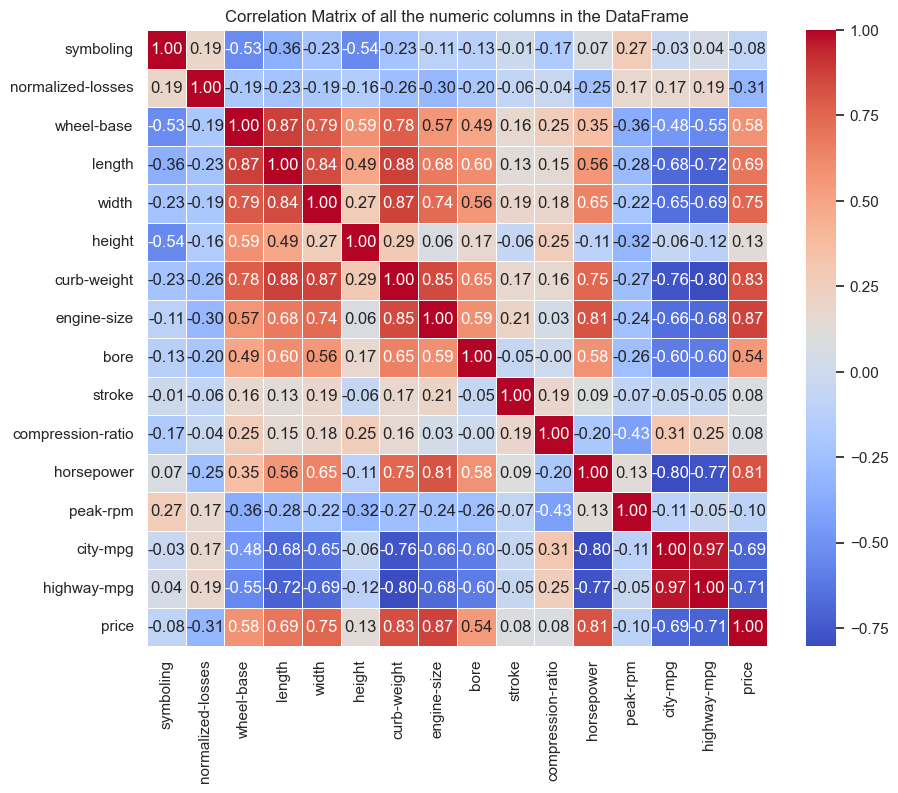

In [119]:
# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with a color bar
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Add title
plt.title('Correlation Matrix of all the numeric columns in the DataFrame')

# Show the plot
plt.show()

In [108]:
df_numeric.info()

<class 'pandas.core.frame.DataFrame'>
Index: 203 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          203 non-null    int64  
 1   normalized-losses  203 non-null    int64  
 2   wheel-base         203 non-null    float64
 3   length             203 non-null    float64
 4   width              203 non-null    float64
 5   height             203 non-null    float64
 6   curb-weight        203 non-null    int64  
 7   engine-size        203 non-null    int64  
 8   bore               199 non-null    float64
 9   stroke             199 non-null    float64
 10  compression-ratio  203 non-null    float64
 11  horsepower         201 non-null    float64
 12  peak-rpm           201 non-null    float64
 13  city-mpg           203 non-null    int64  
 14  highway-mpg        203 non-null    int64  
 15  price              199 non-null    float64
dtypes: float64(10), int64(6)
memory

## Conclusions and Summary based on the EDA conducted

1. Data shape is 205 rows and 26 columns
2. There are no null values but normalized-losses column has '?' which has no value. Hence it has to be investigated
3. Toyota seems to be the most bought car in this dataset. The average price of toyota cars is also very less.
4. Average prices of Jaguar, Mercedes Benz and Porsche are very high. One Reason could be becuase these are luxury brands and usually their costs are very high nad their specifications are also not worth the value. We also dont have enough sold cars data to draw more conlusions about their price.
5. Least average price is chevrolet. Although we dont have enoguh data of them, can be compared with toyota and other cheap brands
6. Volvo brand shows up as the safe car brand(needs investigation)
7. Porsche seems very dangerous, ofcourse its specifications maybe  
8. Mercedes Benz have an equal share of both gas(8 vehicles) and diesel vehicles, followed by volvo(4 vehicles) and then toyota(3 vehicles)
9. Turbo aspiration is expensive compared to normal aspiration(std)
10. Number of doors doesnt really affect the price of the cars
11. Definitely Rear wheel drives(Rwd) are much expensive than the fwd and 4wd cant be estimated properly as we have very few data about it. It makes sense too, because RWDs are used for performance vehicles which cost more money unlike Fwds.
12. Engine location data isnt enoguh to make a conclusion, hence need to be investigated more or more data needed
13. Engine Size, seems to affect the price of the vehicle very positively with a correlation of 0.87
14. Curb weight has a high correlation of 0.83 to price and Horsepower has a correlation of 0.81 to price.
15. And the two more variables that affect the price the most is city mph and highway mph. Seems, like they negatively affect the price with a correlations of -0.69 and -0.71

## Ask questions and answers

1. On what specifications are car prices high?
2. What is the price range of toyota cars?
3. Check the price range of nissan cars as well
4. Why are cars from mercury sold very less? Is it because of price?
5. Dodge and plymouth average prices are also very less. Why? Investigate their specifications
6. Why is volvo considered safe? Investigate

These are some more opf the insights which can be found using the datset. These are some of the question that can be answered easily using the conclusions and summary made using this EDA. There is so much we can go through using this dataset. Feel free to try it.